### 一、讀入顧客的資訊(經緯度、上午與下午投遞成功的機率、單位件數)

In [1]:
import csv
import pandas as pd

In [2]:
letter = pd.read_csv('result.csv',encoding='BIG5')
#letter.drop( axis = 1, inplace = True)

In [3]:
letter.head()

,Unnamed: 0,車牌,狀態,經度,緯度,時間,號碼,上午投遞成功率,下午投遞成功率,重量,重量單位,郵局
0,0,3507-QB,在外暫停,121.547727,25.050895,2018/1/3 10:40,36,0.656250,0.595238,429.615603,1.0,0
1,4,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41,1,0.612903,0.800000,4636.415737,1.0,0
2,6,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44,12,0.731707,0.642857,3376.983448,1.0,0
3,7,3507-QB,在外暫停,121.577467,25.067000,2018/1/3 10:50,2,0.725000,0.688889,2514.927244,1.0,0
4,8,3507-QB,在外暫停,121.582956,25.068892,2018/1/3 10:52,14,0.527778,0.625000,5298.138248,2.0,0


###  二、將資料做清洗，併存成dictionary

In [4]:
initial=[]
for i,row in enumerate(open('result.csv')):
    if i > 0:
        initial.append(row.replace('\n','').split(','))

In [5]:
customer=dict()
for i in initial:
    try:
        index=int(i[0])
        customer[index]=dict()
        customer[index]['Lat']=float(i[3])
        customer[index]['Long']=float(i[4])
        customer[index]['M_S-A_S']=float(i[7])-float(i[8])
        customer[index]['weight']=float(i[10])
    except:
        pass

### 三、將特徵值標準化，準備將顧客分群

In [6]:
from sklearn import preprocessing
import numpy as np

In [7]:
finalDF=pd.DataFrame(customer).T

In [8]:
finalDF

,Lat,Long,M_S-A_S,weight
0,121.547727,25.050895,0.061012,1.0
1,121.547727,25.050895,0.061012,1.0
2,121.547727,25.050895,0.061012,1.0
3,121.547727,25.050895,0.061012,1.0
4,121.549143,25.051580,-0.187097,1.0
5,121.549143,25.051580,-0.187097,1.0
6,121.551000,25.061429,0.088850,1.0
7,121.577467,25.067000,0.036111,1.0
8,121.582956,25.068892,-0.097222,2.0
9,121.582956,25.068892,-0.097222,2.0


In [9]:
finalDF_2=finalDF.drop([19])

In [10]:
finalDF_3=finalDF_2.drop('weight',axis=1)

In [11]:
finalDF_3 = preprocessing.scale(finalDF_2.drop('weight',axis=1))

In [12]:
finalDF_3=pd.DataFrame(finalDF_3)

In [13]:
finalDF_3

,0,1,2
0,-0.814917,-0.342172,0.716378
1,-0.814917,-0.342172,0.716378
2,-0.814917,-0.342172,0.716378
3,-0.814917,-0.342172,0.716378
4,-0.704504,-0.272768,-1.533366
5,-0.704504,-0.272768,-1.533366
6,-0.559810,0.724633,0.968803
7,1.502790,1.288872,0.490588
8,1.930584,1.480482,-0.718422
9,1.930584,1.480482,-0.718422


In [14]:
finalDF_3['weight']=finalDF['weight']
finalDF_3=finalDF_3.drop([19])

In [15]:
finalDF_4=finalDF_3.drop('weight',axis=1)

In [16]:
finalDF_3['weight']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     2.0
9     2.0
10    1.0
11    3.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
Name: weight, dtype: float64

In [17]:
add=[]
for i,j in enumerate(finalDF_3['weight']):
    k=j-1
    if k:
        if k > 0:
            for time in range(int(k)):
                add.append([finalDF_3[0][i],finalDF_3[1][i],finalDF_3[2][i]])
finalDF_5 = pd.DataFrame(add, columns=[0,1,2])

In [18]:
finalDF_4=finalDF_4.append(finalDF_5)

In [19]:
finalDF_4

,0,1,2
0,-0.814917,-0.342172,0.716378
1,-0.814917,-0.342172,0.716378
2,-0.814917,-0.342172,0.716378
3,-0.814917,-0.342172,0.716378
4,-0.704504,-0.272768,-1.533366
5,-0.704504,-0.272768,-1.533366
6,-0.559810,0.724633,0.968803
7,1.502790,1.288872,0.490588
8,1.930584,1.480482,-0.718422
9,1.930584,1.480482,-0.718422


### 四、利用改善過的k-means分群，且每一群的服務件數一致。

In [20]:
from clustering.equal_groups import EqualGroupsKMeans

clf = EqualGroupsKMeans(n_clusters=2)

clf.fit(finalDF_4)

clf.labels_

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
finalDF_4['label']=clf.labels_

### 將結果視覺化

In [22]:
import matplotlib.pyplot as plt

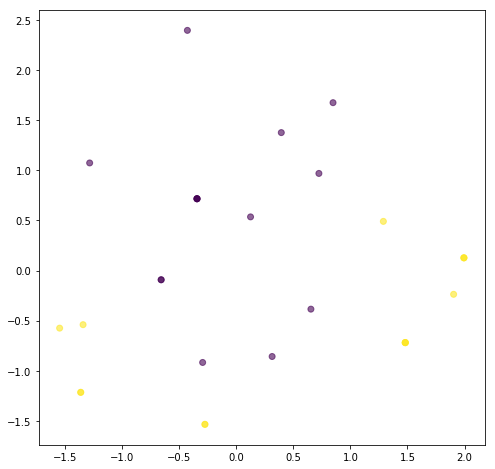

In [23]:
fig = plt.figure(figsize = (8,8))
plt.scatter(finalDF_4[1],finalDF_4[2], alpha=0.6,c=clf.labels_)  

In [30]:
finalDF_5=finalDF_4.drop_duplicates(subset=None, keep='first', inplace=False)

In [31]:
finalDF_5.to_excel('result_label.xls',na_rep=False)

###  ---------------------------可以不要理以下的------------------------------------

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(finalDF)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 5)
ax.set_ylabel('Principal Component 2', fontsize = 5)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'], alpha=0.6) 

In [ ]:
finalDf_2 = pd.concat([principalDf], axis = 1)